## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Importing Dataset

In [2]:
dataset = pd.read_csv('../datasets/train.csv')
dataset.head(5)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


## Dataset Summary

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


# Numerical Features

In [4]:
num_features = dataset.select_dtypes(include=np.number)
num_features.head(7)

,id,model_year,milage,price
0,0,2007,213000,4200
1,1,2002,143250,4999
2,2,2002,136731,13900
3,3,2017,19500,45000
4,4,2021,7388,97500
5,5,2018,40950,29950
6,6,2016,62200,28500


## Histograms

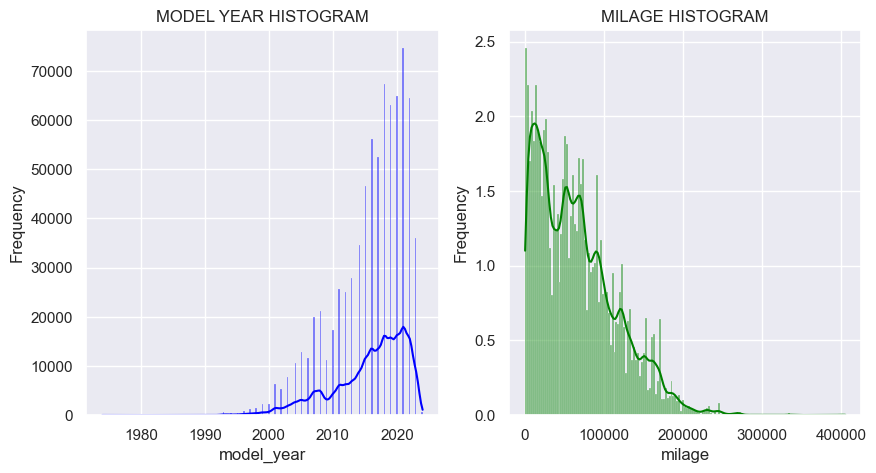

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(data=num_features['model_year'], stat='frequency', kde=True, color='blue', ax=axes[0])
axes[0].set_title('MODEL YEAR HISTOGRAM')

sns.histplot(data=num_features['milage'], stat='frequency', kde=True, color='green', ax=axes[1])
axes[1].set_title('MILAGE HISTOGRAM')

plt.show()

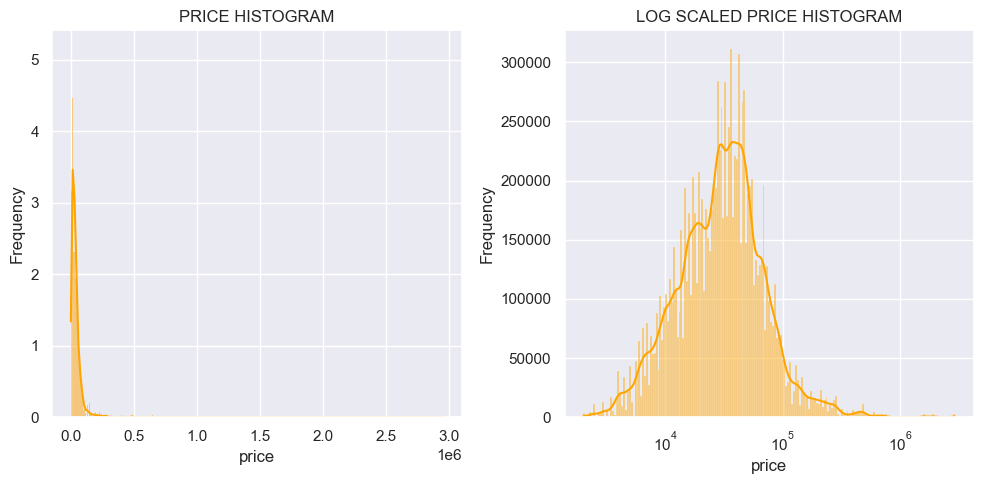

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(data=num_features['price'], stat='frequency',
             kde=True, color='orange', ax=axes[0])
axes[0].set_title('PRICE HISTOGRAM')

sns.histplot(data=num_features['price'], stat='frequency',
             kde=True, color='orange', log_scale=True, ax=axes[1])
axes[1].set_title('LOG SCALED PRICE HISTOGRAM')
plt.tight_layout()
plt.show()

## CORRELATIONS
### 1. Price and Model year
### 2. Price and Milage
### 3. Milage and Model year

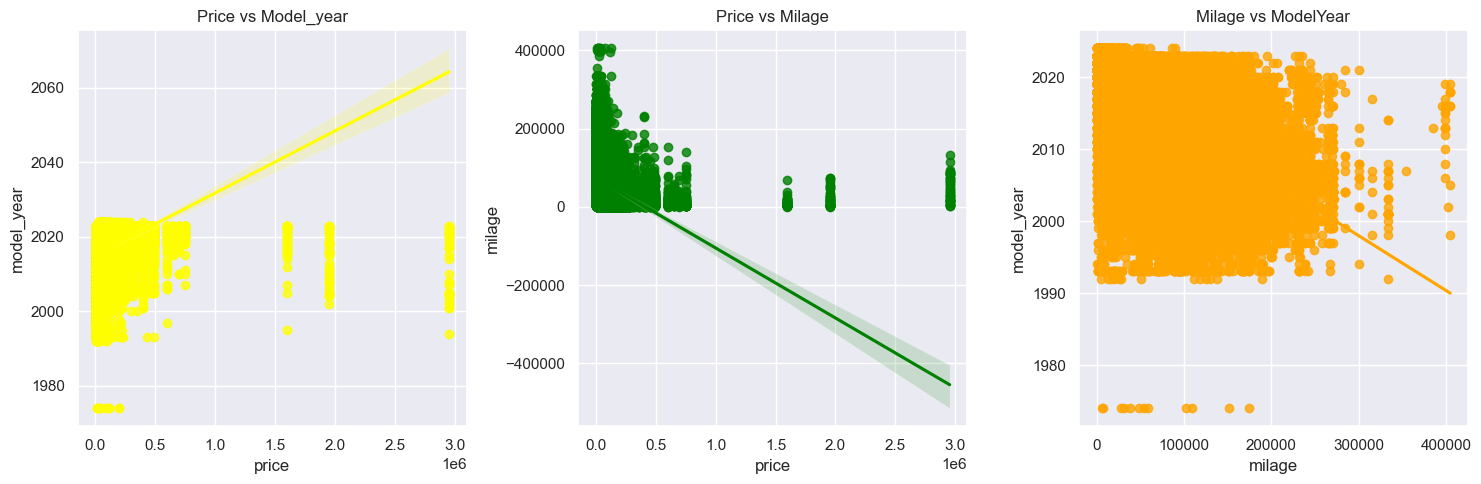

In [7]:
# 1, 2, 3
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.regplot(x='price', y='model_year', data=num_features, color='yellow', ax=axes[0])
axes[0].set_title('Price vs Model_year')
sns.regplot(x='price', y='milage', data=num_features, color='green', ax=axes[1])
axes[1].set_title('Price vs Milage')
sns.regplot(x='milage', y='model_year', data=num_features, color='orange', ax=axes[2])
axes[2].set_title('Milage vs ModelYear')


plt.plot()
plt.tight_layout()


## Correlation Matrix

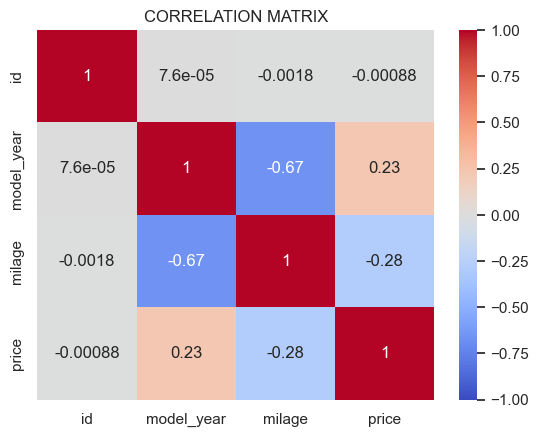

In [8]:
corr_matrix = num_features.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('CORRELATION MATRIX')
plt.show()

## Boxplots For Milage, Model_year and Price

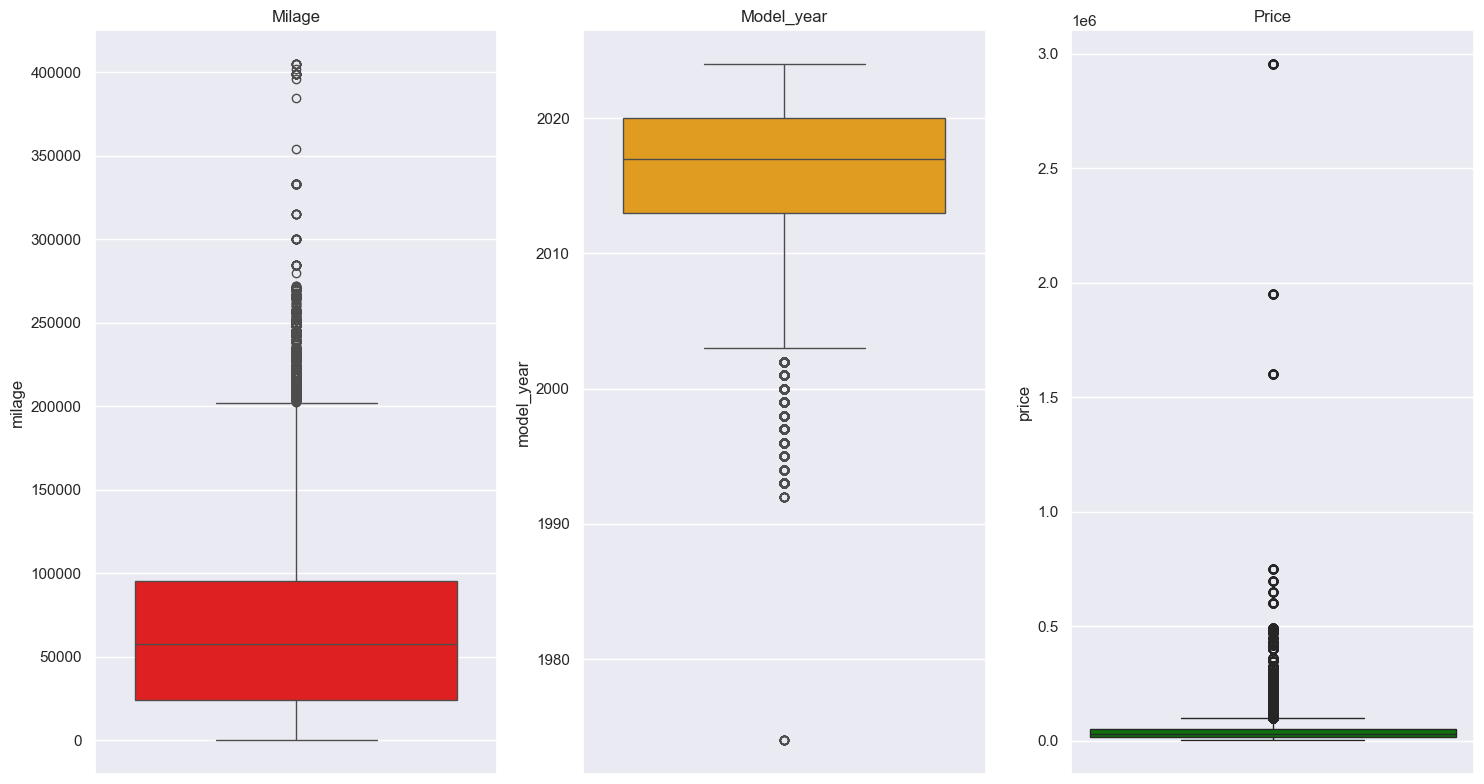

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(15, 8))

sns.boxplot(num_features['milage'], color='red', ax=axes[0])
axes[0].set_title('Milage')
sns.boxplot(num_features['model_year'], color='orange', ax=axes[1])
axes[1].set_title('Model_year')
sns.boxplot(num_features['price'], color='green', ax=axes[2])
axes[2].set_title('Price')

plt.plot()
plt.tight_layout()


# Categorical Features

In [10]:
cat_features = dataset.select_dtypes(exclude=np.number)
cat_features.head(7)

,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,MINI,Cooper S Base,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes
1,Lincoln,LS V8,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes
2,Chevrolet,Silverado 2500 LT,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes
3,Genesis,G90 5.0 Ultimate,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes
4,Mercedes-Benz,Metris Base,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes
5,Audi,A6 2.0T Sport,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,White,–,None reported,Yes
6,Audi,A8 L 3.0T,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Black,Black,None reported,Yes


## Barplots

[]

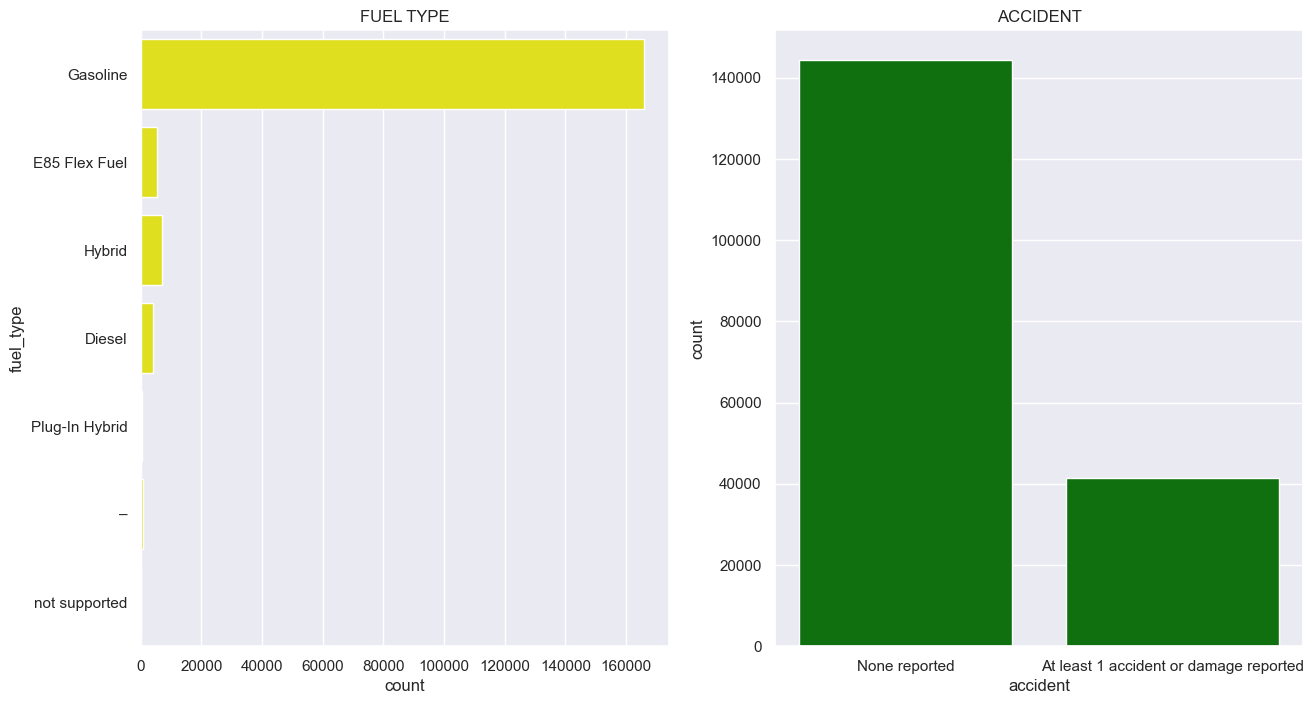

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
sns.countplot(cat_features['fuel_type'], color='yellow', ax=axes[0])
axes[0].set_title('FUEL TYPE')

sns.countplot(cat_features, x='accident', color='green', ax=axes[1])
axes[1].set_title('ACCIDENT')
plt.plot()

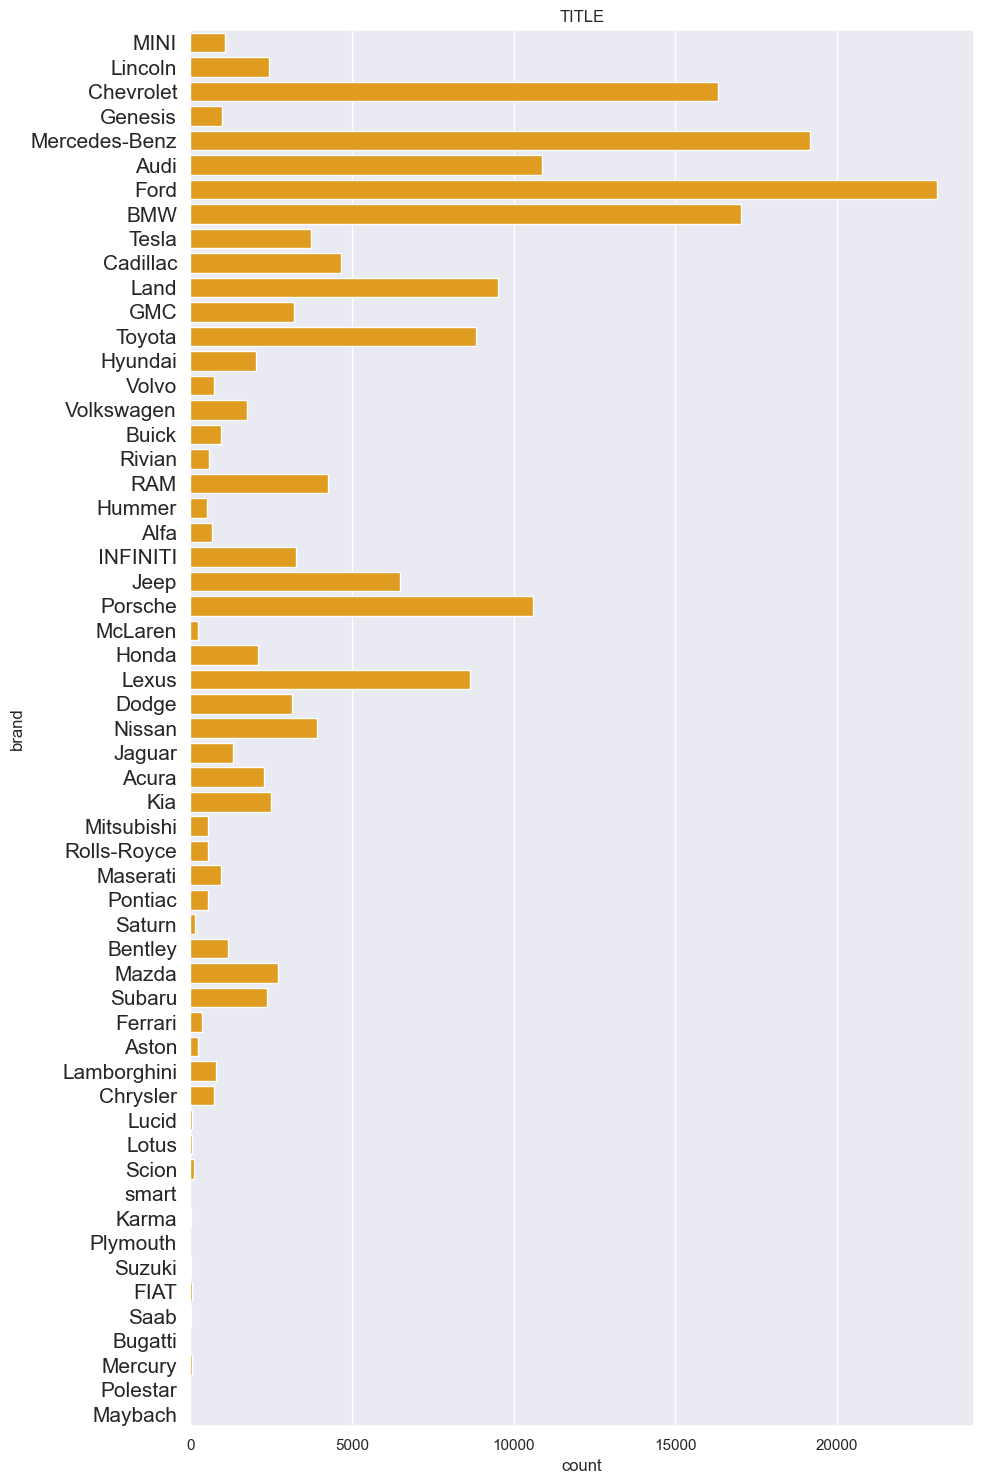

In [12]:
plt.figure(figsize=(10, 15))
sns.countplot(cat_features['brand'], color='orange')
plt.yticks(rotation=0, fontsize=15)
plt.title("TITLE")
plt.tight_layout()
plt.show()

[]

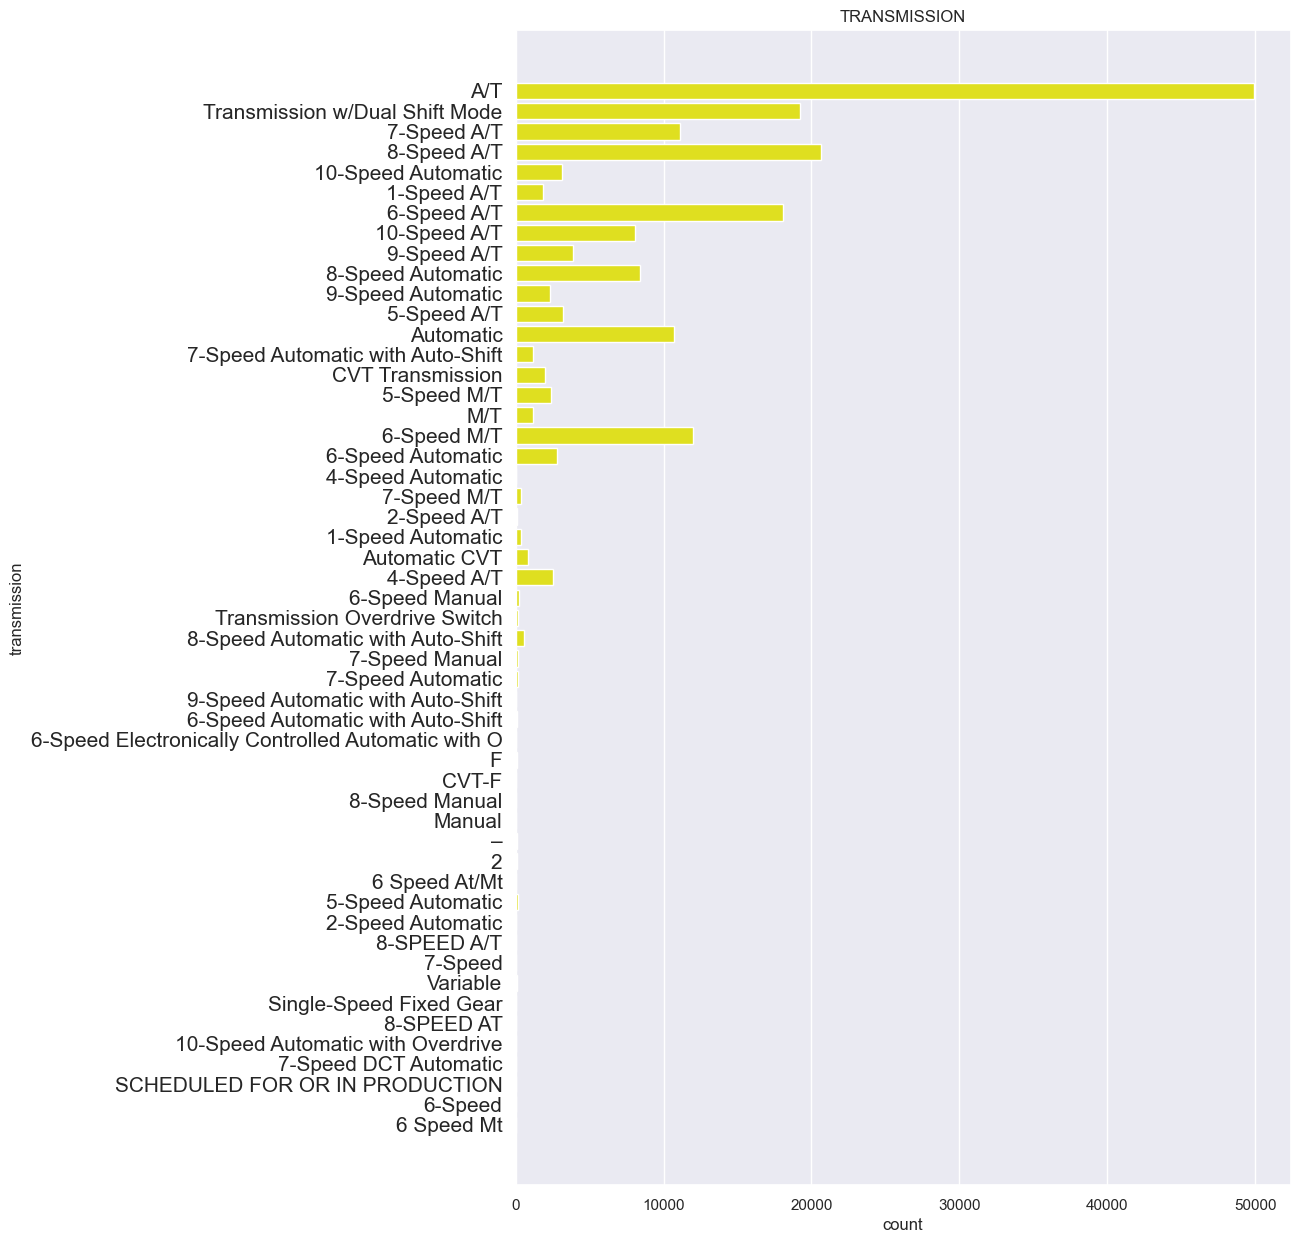

In [13]:
plt.figure(figsize=(10, 15))
sns.countplot(cat_features['transmission'], color='yellow')
plt.yticks(rotation=0, fontsize=15)
plt.title('TRANSMISSION')
plt.plot()